In [1]:
import os

os.chdir('C:/Users/EunJin/Desktop/논문 데이터')
os.getcwd()

'C:\\Users\\EunJin\\Desktop\\논문 데이터'

In [2]:
import pandas as pd

car_df1_cluster0 = pd.read_pickle('car_df1_cluster0.pkl')

In [3]:
len(car_df1_cluster0)

309926

In [4]:
car_df1_cluster0['link_id'].nunique()

66

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(car_df1_cluster0.drop(['date','road_name','link_id','start_point','end_point','cluster','y'],axis = 1), car_df1_cluster0['y'], test_size=0.3, random_state=333)

In [5]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [6]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred) : 
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_cv_test(model, train_X, train_y, test_X, test_y, is_log) :

    train_rmse = []
    valid_rmse = []
    
    print('##### {} #####'.format(model.__class__.__name__))
        
    for i, (train_idx, val_idx) in enumerate(kf.split(train_X)):
        X_train, X_val = train_X.iloc[train_idx, :], train_X.iloc[val_idx, :]
        y_train, y_val = train_y[train_idx], train_y[val_idx]

        model.fit(X_train, y_train)
        
        if is_log :
            y_train = np.expm1(y_train)
            y_val = np.expm1(y_val)
            pred_train = np.expm1(model.predict(X_train))
            pred_valid = np.expm1(model.predict(X_val))
        else :
            pred_train = model.predict(X_train)
            pred_valid = model.predict(X_val)

        print('{0} fold train rmse : {1:.3f} valid rmse : {2:.3f}'.format(i, rmse(y_train, pred_train), rmse(y_val, pred_valid)))
        
        train_rmse.append(rmse(y_train, pred_train))
        valid_rmse.append(rmse(y_val, pred_valid))

    print('\n')    
    print('mean train rmse : {0:.3f} mean valid rmse : {1:.3f}'.format(np.mean(train_rmse), np.mean(valid_rmse)))

    
    model.fit(train_X, train_y)
    
    if is_log :
        test_y = np.expm1(test_y)
        pred_test = np.expm1(model.predict(test_X))
    else :
        pred_test = model.predict(test_X)
    
    print('test rmse {0:.3f} '.format(rmse(test_y, pred_test)))
    
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3, random_state = 333)

In [7]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression()

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train))
X_test_sc = pd.DataFrame(sc.transform(X_test))

In [11]:
model_cv_test(lr, X_train, y_train, X_test, y_test, False)

##### LinearRegression #####
0 fold train rmse : 5.075 valid rmse : 5.093
1 fold train rmse : 5.074 valid rmse : 5.096
2 fold train rmse : 5.093 valid rmse : 5.058


mean train rmse : 5.081 mean valid rmse : 5.082
test rmse 5.107 


In [12]:
ridge = Ridge()
model_cv_test(ridge, X_train_sc, y_train, X_test_sc, y_test, False)

##### Ridge #####
0 fold train rmse : 5.075 valid rmse : 5.093
1 fold train rmse : 5.074 valid rmse : 5.096
2 fold train rmse : 5.093 valid rmse : 5.058


mean train rmse : 5.081 mean valid rmse : 5.082
test rmse 5.107 


In [13]:
lasso = Lasso()
model_cv_test(lasso, X_train_sc, y_train, X_test_sc, y_test, False)

##### Lasso #####
0 fold train rmse : 6.435 valid rmse : 6.432
1 fold train rmse : 6.435 valid rmse : 6.422
2 fold train rmse : 6.439 valid rmse : 6.455


mean train rmse : 6.436 mean valid rmse : 6.437
test rmse 6.440 


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs = -1)
#model_cv_test(rf, X_train, y_train, X_test, y_test, False)

In [25]:
model_cv_test(rf, X_train_sc, y_train, X_test_sc, y_test, False)

##### RandomForestRegressor #####
0 fold train rmse : 0.993 valid rmse : 2.360
1 fold train rmse : 1.000 valid rmse : 2.373
2 fold train rmse : 0.997 valid rmse : 2.348


mean train rmse : 0.997 mean valid rmse : 2.360
test rmse 2.281 


In [15]:
rf.fit(X_train,y_train)

C:\Users\EunJin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

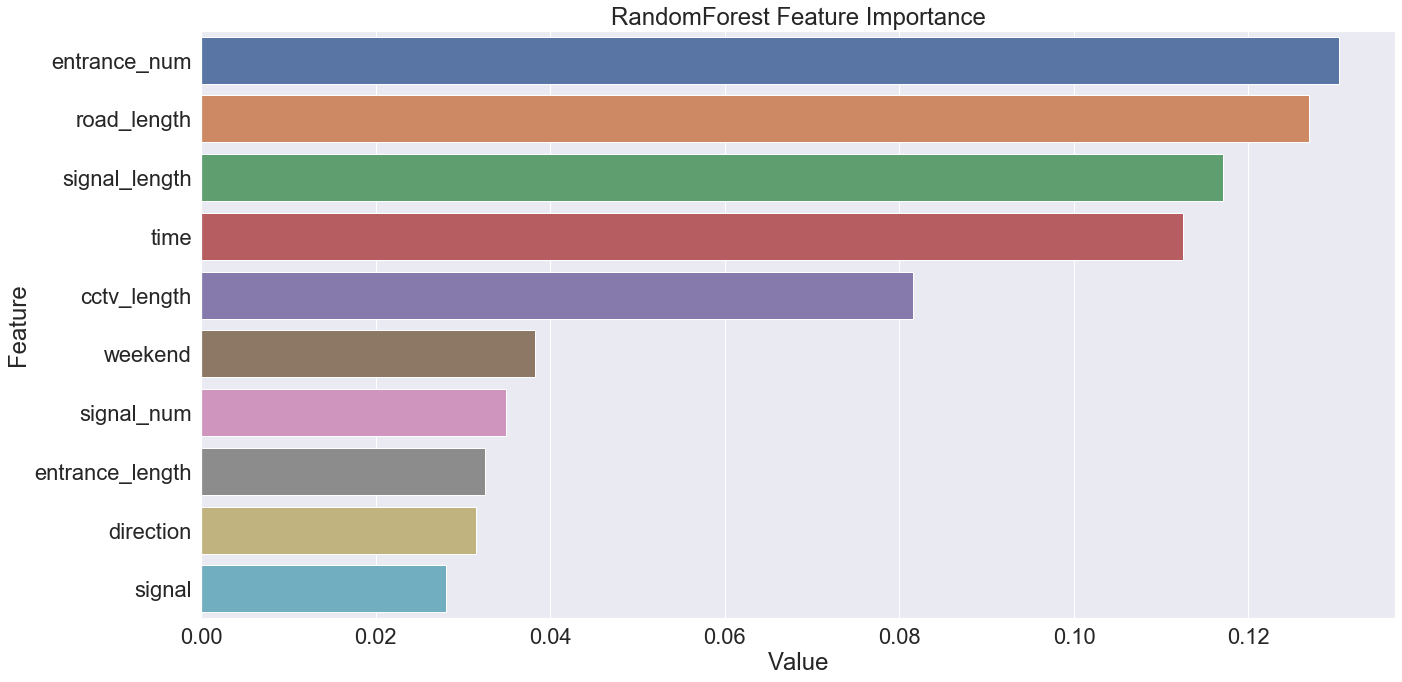

In [18]:
feature_imp = pd.DataFrame(sorted(zip(rf.feature_importances_, X_train.columns)), columns=['Value','Feature'])

sns.set(font_scale=2)
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[:10])
plt.title('RandomForest Feature Importance')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from numpy import *
from math import sqrt

In [21]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    mse = mean_squared_error(y_test, pred) 
    rmse = sqrt(mse)
    r2 = r2_score(y_test, pred)
    
    
    print('###',model.__class__.__name__,'###')
    print('MSE: {0:.3f}, RMSE: {1:.3f}, R2: {2:.3F}'.format(mse, rmse, r2*100))

In [22]:
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [23]:
get_model_predict(xgb, X_train, X_test, y_train, y_test)

### XGBRegressor ###
MSE: 12.174, RMSE: 3.489, R2: 74.768


In [24]:
get_model_predict(lgb, X_train, X_test, y_train, y_test)

### LGBMRegressor ###
MSE: 7.122, RMSE: 2.669, R2: 85.239


In [26]:
model_cv_test(xgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### XGBRegressor #####
0 fold train rmse : 3.496 valid rmse : 3.503
1 fold train rmse : 3.440 valid rmse : 3.459
2 fold train rmse : 3.450 valid rmse : 3.440


mean train rmse : 3.462 mean valid rmse : 3.467
test rmse 3.489 


In [27]:
model_cv_test(lgb, X_train_sc, y_train, X_test_sc, y_test, False)

##### LGBMRegressor #####
0 fold train rmse : 2.626 valid rmse : 2.652
1 fold train rmse : 2.624 valid rmse : 2.665
2 fold train rmse : 2.627 valid rmse : 2.637


mean train rmse : 2.626 mean valid rmse : 2.652
test rmse 2.665 


## cluster0은 rmse 기준으로 randomForest 선택

In [30]:
car_df1_cluster0.link_id.nunique()

66